In [1]:
import pandas as pd

In [2]:
cna = pd.read_csv('data_CNA.txt', sep='\t', index_col=0)
fusion = pd.read_csv('data_fusions.txt', sep='\t')
ext = pd.read_csv('data_mutations_extended.txt', sep='\t')
print(cna.shape, fusion.shape, ext.shape)

(965, 1487) (403, 9) (23225, 64)


/tmp/ipykernel_1965366/1600377234.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  ext = pd.read_csv('data_mutations_extended.txt', sep='\t')


In [3]:
cna.head()

,GENIE-DFCI-002643-6598,GENIE-DFCI-008624-7126,GENIE-DFCI-003423-6929,GENIE-DFCI-007675-6942,GENIE-DFCI-008889-6970,GENIE-DFCI-004251-6964,GENIE-DFCI-008840-6985,GENIE-DFCI-008622-7765,GENIE-DFCI-006859-7774,GENIE-DFCI-008759-7792,...,GENIE-VICC-107627-unk-1,GENIE-VICC-484816-unk-1,GENIE-VICC-275019-unk-1,GENIE-VICC-279076-unk-1,GENIE-VICC-382607-unk-1,GENIE-VICC-124847-unk-1,GENIE-VICC-669632-unk-2,GENIE-VICC-185466-unk-1,GENIE-VICC-354847-unk-1,GENIE-VICC-143079-unk-1
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
ABCB11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACTG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

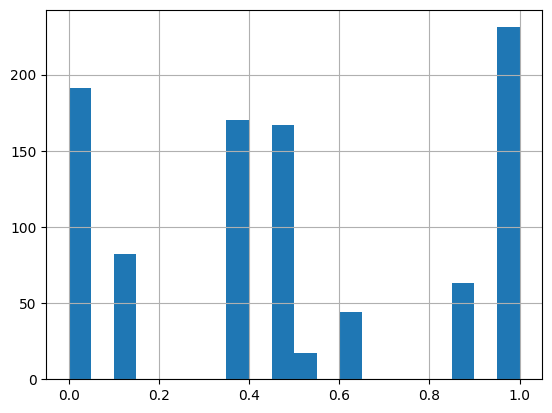

In [4]:
#calculate the % not null for each gene
not_null_dict = {}
for gene in cna.index:
    not_null_dict[gene] = cna.loc[gene].notnull().mean()
#make a histogram of the % not null
pd.Series(not_null_dict).hist(bins=20)



In [5]:
#keep only genes with >0.8 not null
cna = cna.loc[pd.Series(not_null_dict)[pd.Series(not_null_dict)>0.8].index]
print(cna.shape)

(294, 1487)


In [6]:
fusion.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA_support,RNA_support,Method,Frame
0,PARK2,NaN,MSK,GENIE-MSK-P-0002702-T01-IM3,PARK2-intragenic,yes,unknown,NaN,unknown
1,RNF43,NaN,MSK,GENIE-MSK-P-0004140-T01-IM5,RNF43-intragenic,yes,unknown,NaN,in frame
2,BRAF,NaN,MSK,GENIE-MSK-P-0004140-T01-IM5,BRAF-intragenic,yes,unknown,NaN,in frame
3,TP53,NaN,MSK,GENIE-MSK-P-0004140-T02-IM5,TP53-intragenic,yes,unknown,NaN,unknown
4,LATS2,NaN,MSK,GENIE-MSK-P-0004401-T01-IM5,ATP8A2-LATS2 fusion,yes,unknown,NaN,out of frame


In [7]:
ext.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,FILTER,Polyphen_Prediction,Polyphen_Score,SIFT_Prediction,SIFT_Score,SWISSPROT,n_depth,t_depth,Annotation_Status,mutationInCis_Flag
0,PALB2,79728,DFCI,GRCh37,16,23651599,23651599,+,intron_variant,Intron,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,113.0,SUCCESS,False
1,FBXW7,55294,DFCI,GRCh37,4,153258956,153258956,+,"missense_variant,splice_region_variant",Missense_Mutation,...,PASS,probably_damaging,0.993,deleterious,0.00,NaN,NaN,230.0,SUCCESS,False
2,EGFR,1956,DFCI,GRCh37,7,55221710,55221710,+,missense_variant,Missense_Mutation,...,PASS,possibly_damaging,0.882,deleterious,0.03,NaN,NaN,246.0,SUCCESS,False
3,PSMD13,5719,DFCI,GRCh37,11,247403,247403,+,missense_variant,Missense_Mutation,...,PASS,possibly_damaging,0.811,tolerated,0.08,NaN,NaN,301.0,SUCCESS,False
4,KRAS,3845,DFCI,GRCh37,12,25398284,25398284,+,missense_variant,Missense_Mutation,...,PASS,benign,0.303,deleterious,0.00,NaN,NaN,277.0,SUCCESS,False


In [8]:
ext.columns

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Consequence',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Match_Norm_Seq_Allele2', 'Tumor_Validation_Allele1',
       'Tumor_Validation_Allele2', 'Match_Norm_Validation_Allele1',
       'Match_Norm_Validation_Allele2', 'Verification_Status',
       'Validation_Status', 'Mutation_Status', 'Sequencing_Phase',
       'Sequence_Source', 'Validation_Method', 'Score', 'BAM_File',
       'Sequencer', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count',
       'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq',
       'Protein_position', 'Codons', 'Exon_Number', 'gnomAD_AF',
       'gnomAD_AFR_AF', 'gnomAD_AMR_AF', 'gnomAD_ASJ_AF', 'gnomAD_EAS_AF